# [Topic Modeling](https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24)

In [10]:

from pprint import pprint
import numpy as np
np.random.seed(2018)
import nltk

# reload only imported modules before run
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

'''
pantree bank tags: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
standford source: https://nlp.stanford.edu/software/CRF-NER.shtml
standford online text tree generater: http://nlp.stanford.edu:8080/parser/index.jsp
'''

'\npantree bank tags: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html\nstandford source: https://nlp.stanford.edu/software/CRF-NER.shtml\nstandford online text tree generater: http://nlp.stanford.edu:8080/parser/index.jsp\n'

### constants

In [11]:
start_date = '01-11-2018' #  09-Sep-2018 
end_date = '30-12-2018' # 01-Oct-2018

### We will perform the following steps:

#### 1. Tokenization: 
Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.

In [12]:
# def tokenize(text):
#     return gensim.utils.simple_preprocess(text)

#### 2. Remove small words:
Words that have fewer than 3 characters are removed.

In [13]:
# def isShortWord(token):
#     return len(token) < 3

#### 3. Remove stopwords:
All stopwords are removed.

In [14]:
# def isStopWord(token):
#     return token in gensim.parsing.preprocessing.STOPWORDS

#### 4. lemmatized +  Stemming:
Words are lemmatized — words in third person are changed to first person and verbs in past and future tenses are changed into present.

Words are stemmed — words are reduced to their root form.

In [15]:
# from nltk.corpus import wordnet as wn
# from nltk import pos_tag, word_tokenize
# from nltk.stem.porter import *
# from textblob import TextBlob


# def lemmatize_stemming(token):
#     stemmer = PorterStemmer() #gensim.parsing.stem_text(tokenize) #
#     for word, tag in pos_tag(word_tokenize(token)):
#         wntag = tag[0].lower()
#         wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
#         lemma = WordNetLemmatizer().lemmatize(word, wntag) if wntag else word
#         return TextBlob(lemma).words[0].singularize()
#     return ''

#### 5. Replace Emojis:

In [16]:
# ## get emoji characters file path
# def getEmojis():
#     from dataSource import getEmojis
#     comments_file_path = getDataSourcePathFor(emoji_path)
#     return getEmojis(comments_file_path)#.head()

In [17]:
# def hasEmojicon(token):
    
# def replaceEmojicons(token, emojies):
#     pass
    

## Data Source

In [18]:
# def getNounList(sentence='', tokens = []):
#     from nltk import word_tokenize, pos_tag
#     if len(tokens) > 0:    
#         nouns = [token for token, pos in pos_tag(tokens) if pos.startswith('NN')]
#         return nouns
#     else:
#         nouns = [token for token, pos in pos_tag(word_tokenize(sentence)) if pos.startswith('NN')]
#         return nouns

In [19]:
# text = 'I Have done reviewing, Will be seeing by them'
# print(preprocess(text))

In [20]:
# key is file storage path
# def getDataSourcePathFor(keyForFilePath):
#     import json
#     import os
    
#     config_file_path = os.environ[virtual_env] + '/config.json'

#     with open(config_file_path) as f:
#         config = json.load(f)
#         if keyForFilePath in config:# ['comments_path', 'output_path']
#             return config[keyForFilePath] 
#     return None

In [21]:
# ## get list of comments from stored input csv file
# import dataSource 

# def getListOfComments():
#     ### This is to get csv rows between given dates
#     comments_file_path = getDataSourcePathFor(comments_path)
#     commentsList = getComments(comments_file_path, start_date, end_date) #['comments'] 
#     commentsList = commentsList.sort_values(by='ratings', ascending=True)['comments'] 
#     print('Total number of comments: %s between %s and %s' % (len(commentsList), start_date, end_date))
#     return commentsList

### Text processing

In [22]:
# import re

# def filterWord(token):
#     if not (isStopWord(token) or isShortWord(token)):
#         lemmaWord = lemmatize_stemming(token)
#         if not isShortWord(lemmaWord):
#             return ("".join(re.findall("[a-zA-Z]+", lemmaWord)).lower())
#     return None 
    
# def filters(sentence):
# #     print('..given comments:', sentence)
#     result = []
#     #nouns = getNounList(sentence) # fetch only Nouns
#     for token in tokenize(sentence):#nouns: ###tokenize(text):
#         result.append(filterWord(token))
#     return result

# def filterWords(tokens):
#     return list(filter(lambda token: filterWord(token), tokens))

In [23]:
# def preprocessCommentDocument(document):
#     return list(map(lambda sentence: filters(sentence), document))

### Word Cloud

In [67]:
from wordCloud import showWordCloud
def showCloud(topicCollection):
    showWordCloud(topicCollection) 

### Bag of Words on the Data set

In [68]:
def bow(processed_docs):
    dictionary = gensim.corpora.Dictionary(processed_docs)
    bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
    return bow_corpus

### Sentiment

In [69]:
from getSentiment import getSentiment

def getSentFromCommentList(commentList):
    sentimentList = []
    for sentence in commentList:
        sentiment = getSentiment(sentence)
        sentimentList.append(sentiment)
    return sentimentList


def isNegative(sentiment):
    return sentiment > 0.5


def tokenDictWithPosNegSentiment(sentimentList, document):
    sentDict = {}
    size = range(len(document))
    
    for i in size:
        for token in document[i]:
            v = (0, 0, 0) # (neg, pos, freq)
            if token in sentDict:
                v = sentDict[token]
                
            if isNegative(sentimentList[i]):
                v = (v[0]+1, v[1], v[2]+1)
            else:
                v = (v[0], v[1]+1, v[2]+1)
            sentDict[token] = v
    sentDict.pop('', None)
    return sentDict 

### Main()

In [87]:
import SDataSource
import SConstants
from SWordList import SWordList
from sUtility import SUtility
from sPreprocessor import SPreprocessor


In [88]:
sutility = SUtility()
spreprocessor = SPreprocessor()

# SPreprocessor.resolveDependancy(trieCommon)
dateBetween = [start_date, end_date]
commentsDocument = SDataSource.getListOfComments(dateBetween)#.head(1000)
print('filtered comments: ', len(commentsDocument))
# document preprocessing, cleaning, filtering, replacement, spliting into multiple senetnces from one
processed_doc = []
for sentence in commentsDocument:
    for each in spreprocessor.docCleaning(sentence, False): #should split by ','
        processed_doc.append(each)


Total number of comments: 972 between 01-11-2018 and 30-12-2018
filtered comments:  557


In [89]:
def makeDict(sentence):
    t = spreprocessor.parseToTokens(trieTopic, sentence)
    r = spreprocessor.parseToTokens(trieNReason, sentence)
    print(sentence)
    print('topic is:', t)
    print('reasons are:', r)
    print()
    sutility.dump(t, r)

In [91]:
wordList_file = SDataSource.getDataSourcePathFor(SConstants.wordFile_path)
trieCommon = SWordList(wordList_file)

topic_file = SDataSource.getDataSourcePathFor(SConstants.topic_path)
trieTopic = SWordList(topic_file)

n_reason_file = SDataSource.getDataSourcePathFor(SConstants.p_reason_path)
trieNReason = SWordList(n_reason_file)

..SWordList constructor called 
..SWordList constructor called 
..SWordList constructor called 


In [74]:
l = ['crashing', 'changes', 'upi', 'biometric']
print(spreprocessor.filterWords(l))
    

['crash', 'chang', 'upi', 'biometr']


In [75]:
for each in processed_doc:
    makeDict(each)

i am cant add amount from another upi acoount or also cant transfer from another banks account it shows me benificary account is inactive or major problem not setup a upi id
topic is: ['upi', 'account']
reasons are: ['add amount', None, 'transfer', 'inact', 'problem']

now i am facing another problemi cant login dont know why solve the problem as soon as possible
topic is: ['login']
reasons are: ['face', 'problem']

the lastest update broke the app
topic is: ['updat', 'app']
reasons are: ['broke']

kya yr debit card se funds load nai kar sakte ismekoi kaam ka nai hai ye bank fir
topic is: ['debit card']
reasons are: ['card']

sir app is not open and ifsc of most of the bank dont reflect it was my favorite app but not now
topic is: ['app', 'ifsc']
reasons are: ['open', 'reflect']

hating your services your technical issues were dont ending  highly absence of technological advances now required to stop your services immediately not qualified for asia best bank where as must be qualified 

reasons are: ['open']

the worst banking app i ever used its frequently logout and asking for relogin
topic is: ['app']
reasons are: []

after updating dbs app the all buttons showing plainly without name and am unable login worst app i have seen in banking sector kindly select good company for developing app
topic is: ['app', 'login']
reasons are: []

not useful app time waste
topic is: ['app']
reasons are: []

freezes your account without any intimation
topic is: ['account']
reasons are: ['freez']

its really frustrating no on call supports my app asking for enabling vpa again and again tried to get help from support they have many numbers but every number seems to have same ivr enabled no executive support on the call just worthless
topic is: ['app']
reasons are: ['frustrat']

add money wallet not work
topic is: []
reasons are: []

no help bed sarvis
topic is: []
reasons are: []

very worst app after i logout and close it then always says app stopped working
topic is: ['app']
reason

reasons are: ['face', 'every time', 'forc', 'stop']

cant contact customer care for any complaints or clarification so difficult to contact to bank
topic is: ['customer care']
reasons are: []

there is no debit card option for adding money please implement this option
topic is: ['debit card']
reasons are: ['card']

i have updated app it always popup the notifications tat dbs india unfortunately stopped working could you please resolve this issue
topic is: ['app']
reasons are: ['popup', 'stop']

the dbs bank apps ask us our consent to collect dataon the name of more serviceswhich if i says skip for now the corrupt application takes you to next page kn which it asks are you sure to proceed without consentbut the consent tabs yes or no not showing to you fully so if one clicks right tab he is giving consent to access and left one he still is giving access maybe
topic is: []
reasons are: []

i dont want the debit card for nowbut yet the screen comes up and even when i try to close itit doe

topic: ('app', 142)
reasons [('open', 19), ('slow', 16), ('card', 16), ('bad', 13), ('experi', 12), ('not working', 12), ('error', 7), ('crash', 7), ('reset', 7), ('chang', 6), ('every time', 6), ('popup', 5), ('worst experience', 5), ('servic', 5), ('pathet', 5), ('network', 5), (None, 4), ('stuck', 4), ('unstabl', 4), ('problem', 4)]


/home/nawaz/.virtualenvs/AWSComp/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


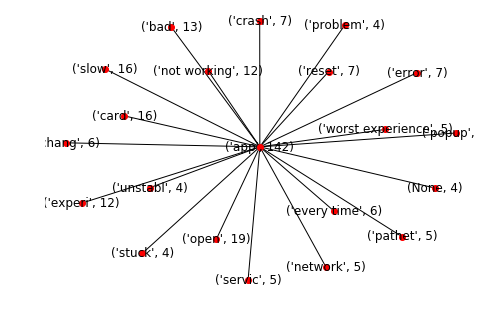

In [83]:
from sNetworkx import SNetworkx
snetworkx = SNetworkx()
totalShow = 20
t = sutility.getFamousTopics()[0]
r = sutility.getReasonDict()[0][1][0: totalShow]
print('topic:', t)
print('reasons', r)
snetworkx.inputData(t, r)
snetworkx.show()

In [84]:
sutility.showTopicCounts()
print('---------------------------------')
sutility.showReasonDict()

[('app', 142), ('account', 58), ('login', 53), ('debit card', 39), ('updat', 38), ('upi', 25), ('transact', 18), ('customer care', 12), ('version', 11), ('atm', 8), ('customer service', 7), ('kyc', 7), ('otp', 6), ('look', 5), ('balanc', 4), ('biometr', 4), ('signup', 3), ('service charge', 2), ('internet', 2), ('speed', 2), ('debit cards', 2), ('ifsc', 2), ('charg', 2), ('back option', 1), (None, 1), ('another bank', 1), ('offer', 1), ('permiss', 1), ('international transactions', 1), ('postal code', 1), ('physical card', 1), ('netbank', 1), ('withdrawl', 1), ('deals and offers', 1)]
---------------------------------
app
[('open', 19), ('slow', 16), ('card', 16), ('bad', 13), ('experi', 12), ('not working', 12), ('error', 7), ('crash', 7), ('reset', 7), ('chang', 6), ('every time', 6), ('popup', 5), ('worst experience', 5), ('servic', 5), ('pathet', 5), ('network', 5), (None, 4), ('stuck', 4), ('unstabl', 4), ('problem', 4), ('face', 4), ('fix it', 4), ('frustrat', 4), ('develop', 3),

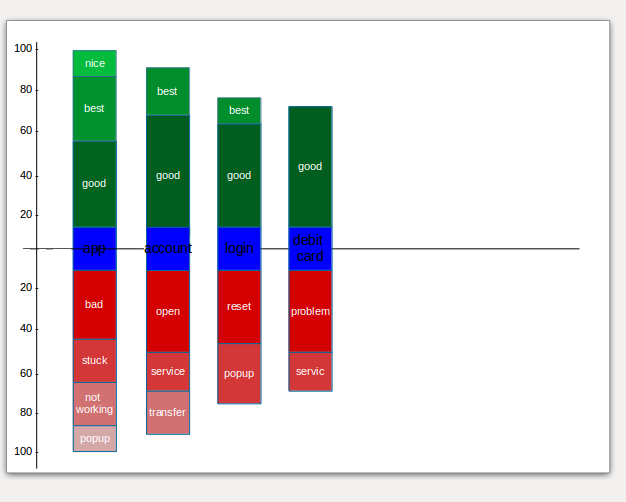

In [35]:
# from IPython.core.display import display, HTML
# # display(HTML('<h1>Hello, world!</h1>'))
# HTML(filename='g.html')
# from PIL import Image                                                                                
# img = Image.open('/home/nawaz/PycharmProjects/SentimentAnalysis/graphDemo.png')
# img.show() 

from IPython.display import Image

Image(filename = "/home/nawaz/PycharmProjects/SentimentAnalysis/graphDemo.png", width=500, height=500)

In [36]:
# sutility.showTopicCounts()
# sentList = commentsDocument.map()
# sentList = commentsDocument.map(getSentiment)

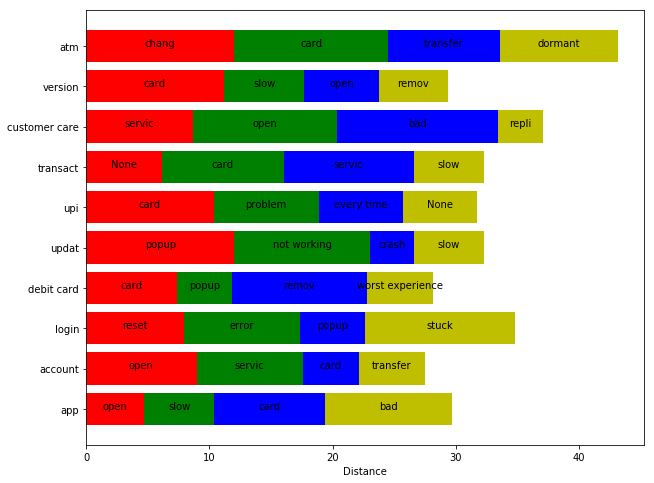

In [85]:
from sGraph import *
makeGraph(sutility.getReasonDict()) # topic + reason list

In [92]:
l = list(commentsDocument)
p = list(processed_doc)

length = len(l)

for i in range(length):
#     print(l[i])
    print(p[i])
    print()

authenticate me for contacting live agent is not working nonoptimized laggy app wont get cashbacks until you contact  times but still its a good app the online banking website on other hand is very good

awesome bank service and userfriendly bank app

this is very good bank and bank transfer limit is very high

superb job  the quickest

nice but cant understand the difference between zero and o in this app for acc no and ifsc code

supar

hasslefree banking system

useful and easy

good

i liked but to activate debit card it is taking long time

banking made damn easy love you dbs keep rocking 

please add option to see average monthlyquarterly balance

good

good bank

very good

nice services bt where to do fingerprint verification

very good app

good

good

very useful to transfer money to others within minuteand intrest level is good

i am new here and st time please consider user feedback very valuable please try to compare your ui with paytm bank ui you will going to find major 

In [29]:
# dump = list(zip(commentsDocument, processed_doc))
# length = len(dump)
# for i in range(length):
#     print(dump[i][0])
#     print(dump[i][1])
# #     print(sentList.iloc[i])
#     print()

In [62]:
import gensim
dictionary = gensim.corpora.Dictionary(processed_doc)
# dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_doc]

In [ ]:
from gensim import corpora, models
corpus_tfidf = models.TfidfModel(bow_corpus)[bow_corpus]

In [ ]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=5, id2word=dictionary, passes=2, workers=2)

In [ ]:
# indexFor = 5
# print('..COMMENT :', commentsDocument[indexFor])
# print('\n..CORPOS :', processed_doc[indexFor])
# # print('\n..BOW:', bow_corpus[indexFor])
# for index, score in sorted(lda_model_tfidf[bow_corpus[indexFor]], key=lambda tup: -1*tup[1]):
#     print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 5)))

In [ ]:
topics = lda_model_tfidf.print_topics(num_words=4)
for topic in topics:
    print(topic)

In [ ]:
# print(processed_doc.values)

In [ ]:
l = tokenDictWithPosNegSentiment(list(sentList), list(processed_doc))


In [ ]:
# print(sortedMostPos(l))

In [ ]:
from showBarGraph import *
# show positive bar graph
showBarCharForSentiment(sortedMostPos(l), pos=True)

In [ ]:
# print(sortedMostNeg(l))
# show positive bar graph
showBarCharForSentiment(sortedMostNeg(l), pos=False)

In [ ]:
showPiChart(sortedMostFreq(l))

In [ ]:
# showTempBarChart()

len of labels: 9


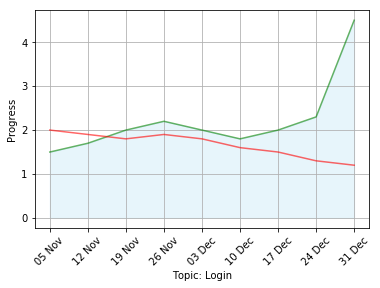

In [42]:
start_date = '01-11-2018' #  09-Sep-2018 (58 days)
end_date = '31-12-2018' # 01-Oct-2018

from sTimeProgressGraph import sTimeProgressGraph
st = sTimeProgressGraph()
x_dates = st.getAllFormatedDatesBetween(start_date, end_date)
st.showGraph(start_date, end_date)
# st.showTooltip()